In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [49]:
# data loading functions

def load_cifar10():
    # load dataset
    (trainX, trainy), (testX, testy) = cifar10.load_data()
    
    trainY, testY = to_categorical(trainy), to_categorical(testy)
    # summarize data 
    print('Training Set: X: {}, y: {}'.format(trainX.shape, trainY.shape))
    print('Testing Set: X: {}, y: {}'.format(testX.shape, testy.shape))
    return trainX, trainY, testX, testY

def normalize(trainX, testX):
    '''
    Normalize images to have values between 0 and 1
    '''
    trainX_norm, testX_norm = trainX.astype('float32') / 255.0, testX.astype('float32') / 255.0
    return trainX_norm, testX_norm

def load_and_preprocess():
    trainX, trainY, testX, testY = load_cifar10()
    trainX_norm, testX_norm = normalize(trainX, testX)
    
    return trainX_norm, trainY, testX_norm, testY

trainX_norm, trainY, testX_norm, testY = load_and_preprocess()
# print first 4 image
# for i in range(4):
#     plt.subplot(221 + i)
#     plt.imshow(trainX[i])

# plt.show()

Training Set: X: (50000, 32, 32, 3), y: (50000, 10)
Testing Set: X: (10000, 32, 32, 3), y: (10000, 1)


In [54]:
def build_model_base1():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3))) 
    model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    opt = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

def build_model_base2():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3))) 
    model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    opt = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

def build_model_base3():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3))) 
    model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    opt = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

'base3'

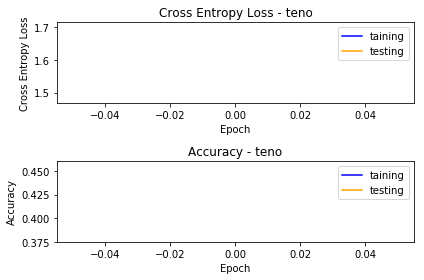

In [51]:
def plot_history(history, model_name):
    '''
    Create 2 subplots:
    1. epoch v.s. training/testing loss 
    2. epoch v.s. training/testing accuracy
    '''
    fig, ax = plt.subplots(2, 2)
    plt.subplot(211)
    plt.plot(history.history['loss'], color='blue', label='taining')
    plt.plot(history.history['val_loss'], color='orange', label='testing')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.title('Cross Entropy Loss - ' + model_name)
    plt.legend()
    plt.subplot(212)
    plt.plot(history.history['accuracy'], color='blue', label='taining')
    plt.plot(history.history['val_accuracy'], color='orange', label='testing')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy - ' + model_name)
    plt.legend()

    fig.tight_layout()
    plt.savefig(model_name + '_plot.png', dpi=300)
    plt.show()
    plt.close()

# model = build_model()
# # fit
# history = model.fit(trainX_norm, trainY, epochs=1, batch_size=64, validation_data=(testX_norm, testY), verbose=1)
# # evaluate
# loss, acc = model.evaluate(testX_norm, testY, verbose=0)
# print('> Testing accuracy: {}%'.format(round(acc, 4) * 100))
plot_history(history, 'teno')

In [61]:
def train_and_validate(model):
    # load data 
    trainX, trainY, testX, testY = load_cifar10()
    # normalize
    trainX_norm, testX_norm = normalize(trainX, testX)
    
    model_name = model.__name__[12:]
    # define model
    model = model()
    # fit
    print('Training ' + model_name + ' model')
    history = model.fit(trainX_norm, trainY, epochs=1, batch_size=64, validation_data=(testX_norm, testY), verbose=0)
    # evaluate
    loss, acc = model.evaluate(testX_norm, testY, verbose=0)
    
    print('> Testing accuracy - {}: {}%'.format(model_name, round(acc, 4) * 100))
    
    print('Saving model...')
    model.save(model_name)
    print('Model Saved')
    
    plot_history(history, model_name)
    return model

Training Set: X: (50000, 32, 32, 3), y: (50000, 10)
Testing Set: X: (10000, 32, 32, 3), y: (10000, 1)
Training base3 model
> Testing accuracy - base3: 10.0%


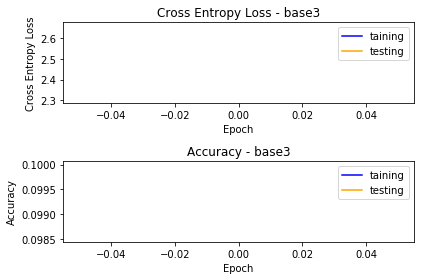

In [59]:
model = train_and_validate(build_model_base3)